In [1]:
from qiskit import QuantumCircuit
from qiskit.circuit.library import QFT
from qiskit import Aer, execute
from qiskit.visualization import plot_histogram
import numpy as np
import math

In [2]:
# For factorizign the number, N= 15
N = 15

n = 4
m = 4

#Using, period root
a = 7

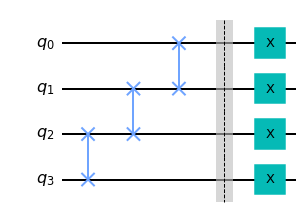

In [3]:
# Making the unitary U = 7^(1) mod 15
U= QuantumCircuit(m)        
U.swap(2,3)
U.swap(1,2)
U.swap(0,1)
U.barrier()
for q in range(4):
    U.x(q)
U.draw('mpl')

In [4]:
# Making the controlled gate con_U = 7^(1) mod 15     ... or 8^(1) mod 15
def con_amodN(m):
    U = QuantumCircuit(m)        
    U.swap(2,3)   
    U.swap(1,2)
    U.swap(0,1)
    for q in range(m):
        U.x(q)  # Comment out for a = 8
    
    U = U.to_gate()
    U.name = "U"
    con_U = U.control()
    
    return con_U

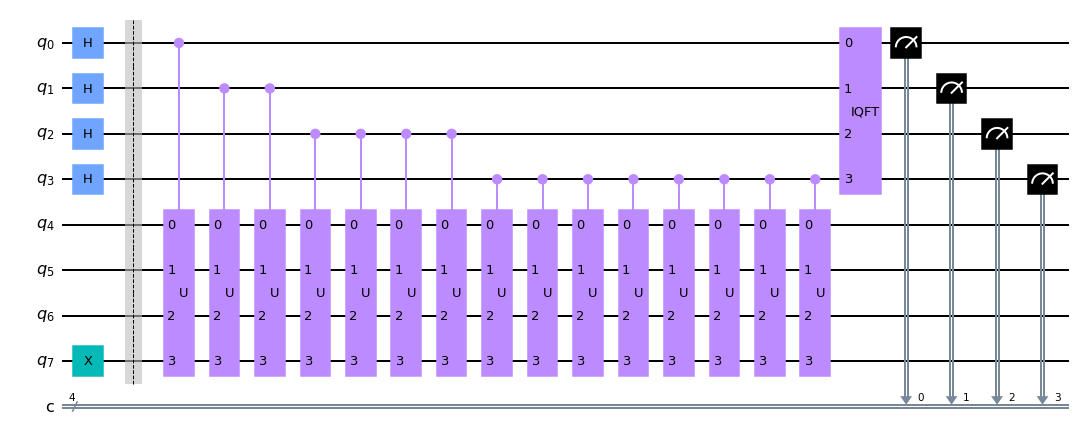

In [5]:
# Shors algorithm 

qc = QuantumCircuit(n+m, n)

#Initialiaing the proper states
qc.h(range(n))
#qc.x(range(n, n+m))
qc.x(n+m-1)

qc.barrier()

# Applyign the Unitary U for a = 7
for i in range(n):
    for j in range(2**i):
        qc.append(con_amodN(m), [i] + [*range(n, n+m)]) # [i] is the contol qubit and [4,5,6.. n+m] are the target qubits
        
# Applying inverse of Fourier
qc.append(QFT(n, do_swaps= False).inverse(), range(n))  

#Measurining the controll qubits
for i in range(n):
    qc.measure(i,i)

qc.draw('mpl')

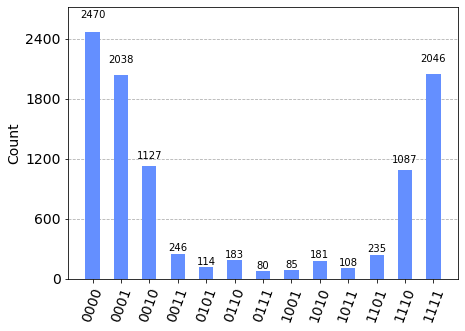

In [6]:
# Simulating the circuit
simulator = Aer.get_backend('qasm_simulator')
counts = execute(qc, backend=simulator, shots=10000).result().get_counts()
plot_histogram(counts)

In [7]:
# USing the ststaes measured, finding the periodic roots (r) 

for i in counts:
    measured_value = int(i[::-1], 2)
  
    if measured_value % 2 != 0:
        #print("Measured value not even")
        continue #measured value should be even as we are doing a^(r/2) mod N and r/2 should be int
    x = int((a ** (measured_value/2)) % N)
    if (x + 1) % N == 0:
        continue
        
    # FInding the factors using gcd arguments
    factor_one = math.gcd(x + 1, N)
    factor_two = math.gcd(x - 1, N) 
    
    # removing trivial factors
    if factor_one == N:
        continue
    if factor_two == N:
        continue
    if factor_one == 1 and factor_two == 1:
        continue
    
    if factor_one != 1:
        factor_two = N//factor_one
        
    if factor_two != 1:
        factor_one = N//factor_two
    
    print("Measured value = ", measured_value, " leads to the factors =", factor_one, factor_two)

Measured value =  4  leads to the factors = 5 3
Measured value =  12  leads to the factors = 5 3
Measured value =  6  leads to the factors = 5 3
Measured value =  10  leads to the factors = 5 3
Measured value =  14  leads to the factors = 5 3


In [8]:
# Refer to QCI pg 235